### Problem 1: Heat Equation
In this problem you will solve the 1-D heat equation,

\begin{equation*}
\frac{\partial T(x,t)}{\partial t} = \frac{K}{C\rho} \frac{\partial^2 T(x,t)}{\partial x^2}
\end{equation*}

where $K$ is the thermal conductivity of the material, $C$ is the specific heat of the material and $\rho$ is its density,
with boundary conditions $T(0, t) = T(L, t) = 0$.


1. Starting with an initial sinusoidal temperature distribution $T(x, 0)=\sin(\pi x/L)$, with $x$ in $[0, L]$, $L=1.0$, and material parameters $\frac{K}{C\rho}=1$, calculate the temperature distribution over time and plot the resulting heat distribution at each time step (i.e. plot $T$ versus $x$). Compare to the analytic solution,
\begin{equation*}
T(x, t) = sin(\pi x/L)e^{-\pi^2 Kt/(L^2C\rho)}
\end{equation*}
and plot the magnitude of the fractional difference between your numerical temperature distribution and the analytical result, $\left|(T_{\rm numerical} - T_{\rm analytic})/T_{\rm analytic}\right|$, in the second plot at each time step (use a log scale). What values of $N_x$ and $\Delta t$ give a maximum fractional error magnitude less than $10^{-3}$ after total time evolution $t=1.0$? Don't forget to check that your choice of $\Delta x$ and $\Delta t$ meets the von Neumann stability condition.

2. The von Neumann stability condition for "leapfrog" discretization of the 1-D heat equation is:
\begin{equation*}
\eta = \frac{K\Delta t}{C \rho \Delta x^2}<\frac{1}{2}
\end{equation*}
Using the same initial conditions as in part (a), check that the temperature diverges in $t$ if $\eta > \tfrac{1}{2}$ by changing $\Delta t$ but keeping other values as in part (a). Include a plot showing the resulting plots after elapsed time $t=1.0$ with $\Delta t$ just over the stability limit to show the instability, and report the value of $\Delta t$ and $\eta$ which you used.


------

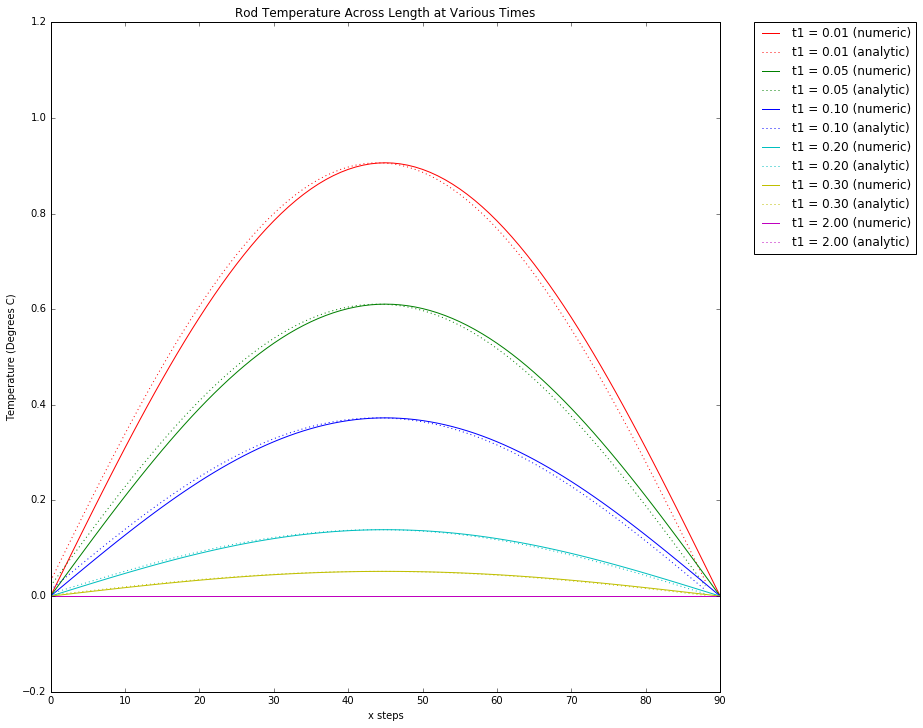

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def heat_equation_rod(T_0, T_L, phi, t_plot, h=1e-6, L=1, D=1, N=90):
    '''
    Solve the 1-dimesional heat equation for a rod with Dirichlet 
    boundary conditions.
    
    Parameters:
    
    T_0: Temperature at x = 0 (left end) for all times t.
    T_L: Temperature at x = L (right end) for all times t.
    phi: Initial condition function, i.e. a function describing the
         temperatures for all x in (0,L) at t = 0.
    t_plot: Time at which the function will be plotted.
         
    L: Rod length. Defaults to 1.
    D: Heat capacity. Defaults to 1.
    N: Number of divisions in grid.
    
    Returns:
    
    T: Array of temperatures
    x: Array of x values of interior points.
    t_plot: Time at which the function will be plotted 
    
    '''

    # Grid spacing    
    a = L/N
    # Time step
    #h = 1e-6
    # Error tolerance
    epsilon = h/1000

    t_final = t_plot + epsilon    

    # Generate x values between x = 0 and x = L exclusive
    x = np.array(range(1,N))*a 
    T_mid = phi(x, L)
    
    # Create arrays
    T = np.empty(N+1,float)
    T[0] = T_0
    T[N] = T_L
    T[1:N] = T_mid

    Tp = np.empty(N+1,float)
    Tp[0] = T_0
    Tp[N] = T_L

    t = 0.0
    c = h*D/(a**2)
    
    while t < t_final:

        # Calculate the new values of T
        Tp[1:N] = T[1:N] + c*(T[0:N-1]+T[2:N+1]-2*T[1:N])
        T, Tp = Tp, T
        t += h
        

        # Make plots at the given times
        if abs(t - t_plot) < epsilon:
            return T, x, t_plot
            
    
def phi(x, L):
    return np.sin(np.pi*x/L)

def analytic(x, t, T_0=0, T_L=0, L=1, D=1):
    return np.sin(np.pi*x/L)*np.exp(-np.pi**2 * D*t/L**2)

def plot_heat_solution():
    T1, x1, t_plot1 = heat_equation_rod(0, 0, phi, t_plot=0.01)
    T2, x2, t_plot2 = heat_equation_rod(0, 0, phi, t_plot=0.05)
    T3, x3, t_plot3 = heat_equation_rod(0, 0, phi, t_plot=0.10)
    T4, x4, t_plot4 = heat_equation_rod(0, 0, phi, t_plot=0.20)
    T5, x5, t_plot5 = heat_equation_rod(0, 0, phi, t_plot=0.30)
    T6, x6, t_plot6 = heat_equation_rod(0, 0, phi, t_plot=2.00)


    A1 = analytic(x1, t_plot1)
    A2 = analytic(x2, t_plot2)
    A3 = analytic(x3, t_plot3)
    A4 = analytic(x4, t_plot4)
    A5 = analytic(x5, t_plot5)
    A6 = analytic(x6, t_plot6)
    
    plt.figure(num=1, figsize=(12, 12))
    
    plt.plot(T1, 'r' , label='t1 = 0.01 (numeric)')
    plt.plot(A1, 'r:', label='t1 = 0.01 (analytic)')
    
    plt.plot(T2, 'g' , label='t1 = 0.05 (numeric)')
    plt.plot(A2, 'g:', label='t1 = 0.05 (analytic)')
            
    plt.plot(T3, 'b' , label='t1 = 0.10 (numeric)')
    plt.plot(A3, 'b:', label='t1 = 0.10 (analytic)')
            
    plt.plot(T4, 'c' , label='t1 = 0.20 (numeric)')
    plt.plot(A4, 'c:', label='t1 = 0.20 (analytic)')
            
    plt.plot(T5, 'y' , label='t1 = 0.30 (numeric)')
    plt.plot(A5, 'y:', label='t1 = 0.30 (analytic)')
            
    plt.plot(T6, 'm' , label='t1 = 2.00 (numeric)')
    plt.plot(A6, 'm:', label='t1 = 2.00 (analytic)')
    
    plt.xlabel('x steps')
    plt.ylabel('Temperature (Degrees C)')
    plt.title('Rod Temperature Across Length at Various Times')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylim(-0.2,1.2)
    plt.show()
    

plot_heat_solution()

Time step used: 1e-6
Epsilon used: 0.001


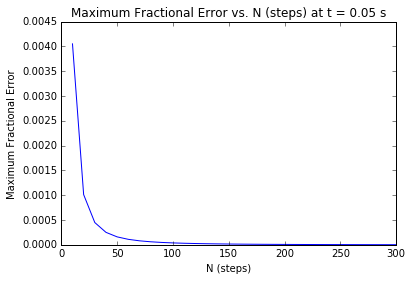

In [76]:
# @TODO: Figure out what you're doing with this...
def plot_error(n_start, n_stop, n_step, t_plot, epsilon):
    error = [ ]
    N = list(range(n_start, n_stop, n_step))
    
    for n in range(n_start, n_stop, n_step):
        T, x, t_plot = heat_equation_rod(0, 0, phi, t_plot, h=1e-6, L=1, D=1, N=n)
        # Arrays aren't the same size and we want to avoid division by zero, 
        # so delete the first and last elements of T.
        T = np.delete(T, [0,len(T)-1])
        A = analytic(x, t_plot)
        
        max_error = np.max(abs(T-A)/A)
        
        error.append(max_error)
        
    print('Time step used: 1e-6')
    print('Epsilon used:', epsilon)
        
    plt.plot(N, error)
    plt.title('Maximum Fractional Error vs. N (steps) at t = 0.05 s')
    plt.xlabel('N (steps)')
    plt.ylabel('Maximum Fractional Error')
    plt.show()

plot_error(10, 301, 10, 0.05, 1e-3)

At t = 1.0 s, the heat in the rod is essentially zero, so I  used t = 0.05 s. Any N > 50is good enough for $10^{-3}$ error.

Eta value: 0.5012639999999999
time step: 1e-06
delta x: 0.0014124293785310734
Unstable!!! Zoinks!!!


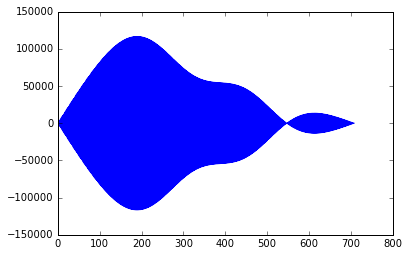

Eta value: 0.499849
time step: 1e-06
delta x: 0.0014144271570014145
Stable!!! Yay!!!!!!


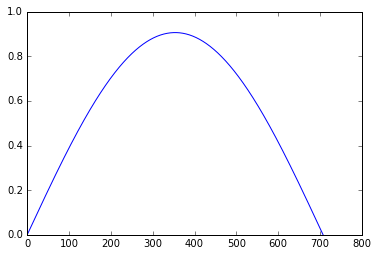

Eta value: 0.648
time step: 2e-05
delta x: 0.005555555555555556
Unstable!!! Zoinks!!!


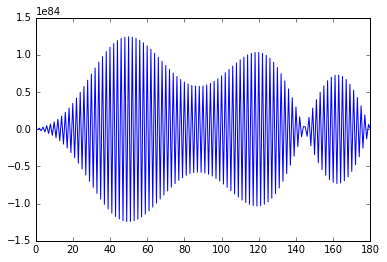

Eta value: 0.324
time step: 1e-05
delta x: 0.005555555555555556
Stable!!! Yay!!!!!!


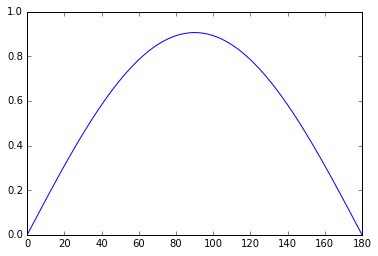

In [119]:
def test_stability(h, n, t_plot):
    T, x, t_plot = heat_equation_rod(0, 0, phi, t_plot, h, L=1, D=1, N=n)
    eta = h/(1/n)**2
    
    print('Eta value:', eta)
    print('time step:', h)
    print('delta x:', 1/n)
    
    if eta >= 1/2:
        print('Unstable!!! Zoinks!!!')
        
    else:
        print('Stable!!! Yay!!!!!!')
        
    plt.plot(T)
    plt.show()

test_stability(1e-6, 708, 0.01)
test_stability(1e-6, 707, 0.01)
test_stability(2e-5, 180, 0.01)
test_stability(1e-5, 180, 0.01)

I printed out the values for $\eta$ for a few plots. The ones with $\eta > \frac{1}{2}$ are wildy oscillatory while the others look as expected--even the one juuuuust below $\frac{1}{2}$.

### Problem 2: Electrostatics
In this problem you will solve for the electric potential $U(\vec{x})$ which satisfies Poisson's equation,

\begin{equation*}
\nabla^2 U(\vec{x}) = -4\pi \rho(\vec{x})
\end{equation*}

We want to solve the particular problem of two conductive capacitor plates at fixed voltages in a grounded box. In practice, the approach is to solve Laplace's equation,

\begin{equation*}
\nabla^2 U(\vec{x}) = 0
\end{equation*}

everywhere between and around the plates, and to fix the potential on the plates.

Write a function to solve Laplace's equation in a 2-D region of space discretized on an $L\times L$ grid by the successive over-relaxation technique with over-relaxation parameter $\omega$. Two parallel capacitor plates, each $L/4$ points long and $L/8$ points apart, are centered in the region, and all boundaries of the region are grounded ($V_{\rm boundary}=0$). One capacitor plate is held at fixed voltage $V_1$, and the second plate is held at $V_2$. You should keep iterating until the maximum (not over-relaxed) change in a point in the region $\Delta$ is less than the tolerance $\delta$, and print the total number of iterations used when the solution is found. Plot the solution after each sweep as it evolves in `plot_1` and plot the change $\Delta$ versus the number of steps taken in `plot_2`.


1. With $L=100$, $V_1=10$, $V_2=-10$, and $\omega=1.0$ (no over-relaxation), find a solution for $U(\vec{x})$ to tolerance $\delta=10^{-3}$ and plot it.  How does this differ from the usual introductory physics class solution based on infinite parallel plates?


2. Using the function and parameters from part (a), vary the over-relaxation parameter $\omega$, and report the results. In particular, how many steps are required to reach a tolerance of $\delta=10^{-5}$ with $\omega=1$ (no over-relaxation)? What value of $\omega$ gives the fastest convergence (least number of steps), and how many steps does it take to reach a tolerance of $\delta=10^{-5}$ with that $\omega$? What is the smallest tolerance you can reach (with optimal over-relaxation) and what limits it? What happens if $\omega > 2.0$?


------

Tolerance: 0.001
Iterations: 802


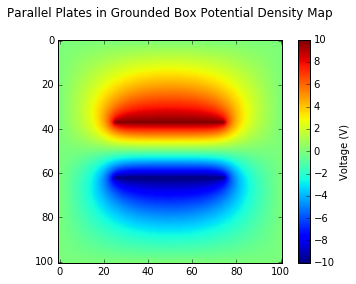

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def parallel_plate_relaxation(L, V1, V2, epsilon, omega=1, plot_error=False):
    """
    Solve Laplace's equation using the Gauss-Seidel method for two 
    parallel plates held a constant voltages in a grounded box.
    
    Parameters:
    
    L: Size of square grid
    V1: Voltage of top plate
    V2: Voltage of bottom plate
    omega: Overrelaxation parameter. Must be less than 2. Values less than 1 do not make sense, but work nevertheless
           
    Returns:
    
    Square array of size L
    """

    U = np.zeros([L+1,L+1])
    
    # 'Create' parallel plates
    U[3*L//8,L//4:3*L//4] = V1
    U[5*L//8,L//4:3*L//4] = V2

    # initialize
    error = 420
    iterations = 0
    
    # Keep track of changes
    changes = [ ]

    while error > epsilon:

        # This is the our array before the enxt iteration (our 'initial' array).
        # This plays the same role as phiprime in the Jacobi method and it is
        # used solely to calculate the difference between iterations.
        U_0= np.empty_like(U)
        U_0[:] = U[:]

        for i in range(L+1):
            for j in range(L+1):
                
                # Do not alter boundary values (grounded box)
                if i==0 or i==L or j==0 or j==L:
                    continue
                    
                # Do not alter boundary values (plates)
                if (i==3*L//8 or i==5*L//8) and (j in range(L//4,3*L//4)):
                    continue
                    
                # Relaxation calculation
                else:
                    U[i,j] = omega/4 * (U[i+1,j] + U[i-1,j] + U[i,j+1] + U[i,j-1]) + (1 -omega) * U[i,j]            
        
        # Calculate error
        error = np.max(abs(U-U_0))
        iterations += 1
        
        changes.append(error)
        
    if plot_error:
        iterations_list = range(1,iterations+1)
        plt.plot(iterations_list, changes)
        plt.xlabel('iterations')
        plt.ylabel('change after iteration')
        plt.title('Tracking Changes After Each Iteration')
        plt.yscale('log')
        plt.show()
        return None
    
    return U, epsilon, iterations

def plot_density_map(U):
    plt.imshow(U, cmap='jet')
    plt.title('Parallel Plates in Grounded Box Potential Density Map', y=1.08)
    plt.colorbar(label='Voltage (V)')
    plt.show()
    
U_1, epsilon_1, iterations_1 = parallel_plate_relaxation(L=100, V1=10, V2=-10, omega=1, epsilon=1e-3)
print('Tolerance:', epsilon_1)
print('Iterations:', iterations_1)
plot_density_map(U_1)

For infinite plates, we expect the electric field between the plates to be uniform and the field outside of the plates to be zero. Hence, we expect the potential to be linear between the plates and constant outside.

In the case of finite plates, this is not the case. The field between the plates is roughly uniform near the center, but as you approach the edges, there is fringing, so the field is no quite uniform near the edges. Furthermore, the electric fields from both plates do not entirely cancel out in the outside region, so we do not have a constant voltage outside of the plates. 

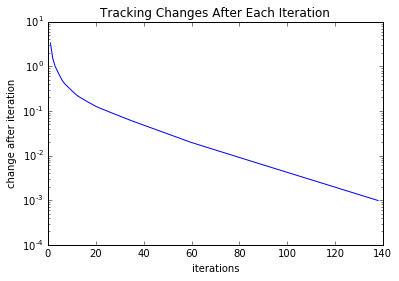

In [135]:
parallel_plate_relaxation(L=30, V1=10, V2=-10, omega=1, epsilon=1e-3, plot_error=True)

The plot above shows the difference between iterations.

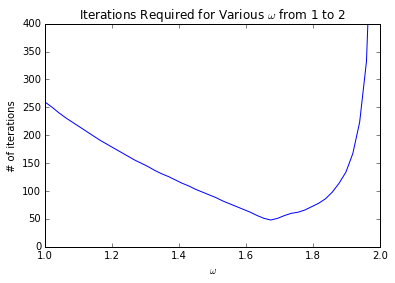

Tolerance: 1e-05
Optimal Omega: 1.67346938776
Minimum Iterations: 48


In [8]:
def plot_omega_dependence(L, V1, V2, epsilon):
    omega_values = np.linspace(1,2, 50)
    # Delete omega = 2 since we have a vertical asymptote at that value.
    omega_values = np.delete(omega_values, -1)
    
    iterations_values = np.empty_like(omega_values)
    
    for i in range(len(omega_values)):
        U, epsilon, iterations = parallel_plate_relaxation(L, V1, V2, epsilon, omega_values[i])
        iterations_values[i] = iterations
    
    plt.plot(omega_values, iterations_values)
    plt.title('Iterations Required for Various $\omega$ from 1 to 2')
    plt.xlabel('$\omega$')
    plt.ylabel('# of iterations')
    plt.xlim(1,2)
    plt.ylim(0,400)
    plt.show()
    
    print('Tolerance:', epsilon)
    print('Optimal Omega:', omega_values[np.argmin(iterations_values)])
    print('Minimum Iterations:', int(min(iterations_values)))
        
plot_omega_dependence(30, 10, -10, 1e-5)

Because it takes an absurd amount of time to plot even just 50 points with $L = 100$, I chose to plot with $L = 30$. This does not change the overall shape of the curve, so it is still completely reasonable to carry on with analysis.

As seen by the graph, increasing $\omega$ improves performance until it hits an optimal value ($\omega = 1.67346938776$ for $L = 30$) This requires 48 iterations. Then, as $\omega$ continues to increase, performance decreases. There is actually a vertical asymptote at $\omega = 2$, we have instability when $\omega > 2$.

Tolerance: 3.6e-15
Iterations: 326


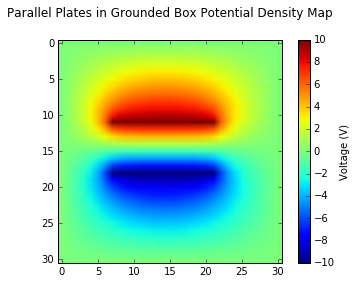

In [9]:
U_2, epsilon_2, iterations_2 = parallel_plate_relaxation(L=30, V1=10, V2=-10, epsilon=3.6e-15, omega=1.67346938776)
print('Tolerance:', epsilon_2)
print('Iterations:', iterations_2)
plot_density_map(U_2)

With the optimal $\omega$, the best tolerance I could get was about $3.6 \cdot 10^{-15}$. I found this by trial and error. The reason why there is a limit on the tolerance is because a finite difference method for second derivatives was used to calculate the values at the grid points. The error associated with the central difference method for second derivatives is 

$$\epsilon = \frac{4C \left\|f(x)\right\|}{h^2} + \frac{1}{2}h^2\left\|f''''(x)\right\|$$.

Our maximum value of $\left\|f(x)\right\|$ is 10, and $h = 1$. $C$ is the precision of Python, and that's $10^{-16}$. We don't really know what $f''''(x)$ is, but we can reasonably assume that it is very small. That leaves us with

$$\epsilon = \frac{4 \cdot 10^{-16} \cdot 10}{1^2} = 4 \cdot 10^{-15}$$,

which is right in the ballpark of what I found by trial and error.